In [2]:
"""Рассматриваем функцию потерь, функцию знаков."""

'Рассматриваем функцию потерь, функцию знаков.'

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

L1 функция потерь MAE 
Для поиска весов градиентный спуск,
используем градиентный спуск 
(численные метод,интерационный).

Модульная функция не гладкая в 
нуле (недифференцуемая), будем доопределять

![alt text](image.png)

In [4]:
list1 = [28, 25.6, 62, 54.4, 81.3]
list2 = [11.2, 42.6, 34.4, 66, 51.3]

data = {"x": list1, "y": list2}

df = pd.DataFrame(data)

In [5]:
df

,x,y
0,28.0,11.2
1,25.6,42.6
2,62.0,34.4
3,54.4,66.0
4,81.3,51.3


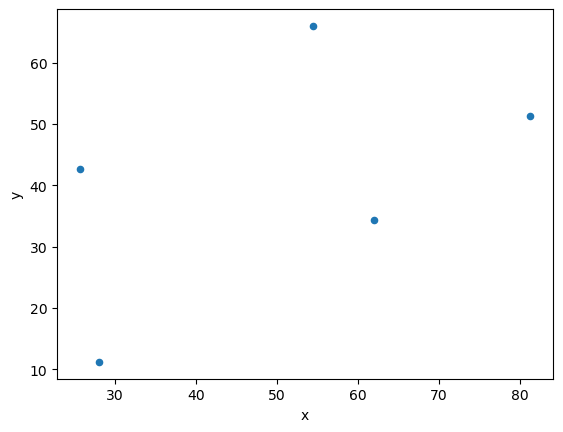

In [6]:
df.plot(x="x", y="y", kind="scatter")
plt.show()

In [7]:
# инициализация веса
weight, bias = 1, 1

In [8]:
df["y_pred"] = df["x"] * weight + bias

In [9]:
df

,x,y,y_pred
0,28.0,11.2,29.0
1,25.6,42.6,26.6
2,62.0,34.4,63.0
3,54.4,66.0,55.4
4,81.3,51.3,82.3


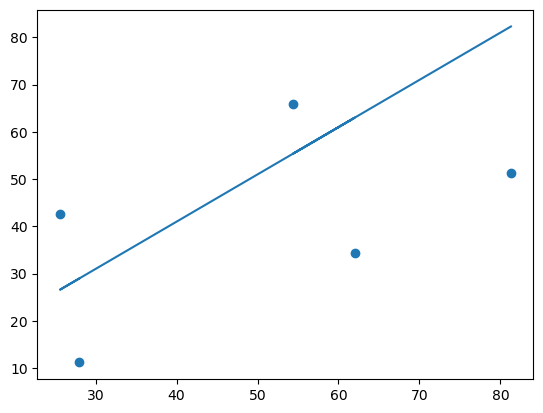

In [10]:
plt.scatter(df["x"], df["y"])
plt.plot(df["x"], df["y_pred"])
plt.show()

In [11]:
# MAE
df["error_abs"] = np.abs(df["y"] - df["y_pred"])

In [12]:
df["error_abs"].mean()

20.8

In [13]:
np.sign(-999)

-1

In [14]:
np.sign(1000)

1

In [15]:
np.sign(0)

0

![alt text](image-5.png)


- x1e1
- |e1|

In [16]:
# df['w_change'] = df['x'] * (df['y'] - df['y_pred']/
# np.abs( df['y'] - df)['y_pred']) MAE, деление на 0
# df['w_change'] = df['x'] * np.sign(df['y'] - df)['y_pred']

df["w_change"] = np.where(
    df["y"] != df["y_pred"],
    df["x"] * (df["y"] - df["y_pred"]) / np.abs(df["y"] - df["y_pred"]),
    0,
)  # if y_true - y_pred

In [17]:
df

,x,y,y_pred,error_abs,w_change
0,28.0,11.2,29.0,17.8,-28.0
1,25.6,42.6,26.6,16.0,25.6
2,62.0,34.4,63.0,28.6,-62.0
3,54.4,66.0,55.4,10.6,54.4
4,81.3,51.3,82.3,31.0,-81.3


In [18]:
# минус значит отпускаем вниз
df["w_change"].mean()

-18.259999999999998

In [19]:
df["b_change"] = np.sign(df["y"] - df["y_pred"])

In [20]:
df["b_change"].mean()

-0.2

In [21]:
nu = 0.1

In [22]:
# сдвинем немного w,b
# w = weight + nu * df["w_change"].mean()

w = weight +  nu  * df['w_change'].mean()